In [ ]:
#Importing Libraries
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np

#Importing Dataset
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#Data Exploration
#Descriptive Statistics
df.describe()
df.info()
#Missing Values
df.isnull().sum()
#Duplicated Values
df.duplicated().sum()
#columns
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
#Exploratory Data Analysis
#imported matplot for visualization
import matplotlib.pyplot as plt
import seaborn as sns


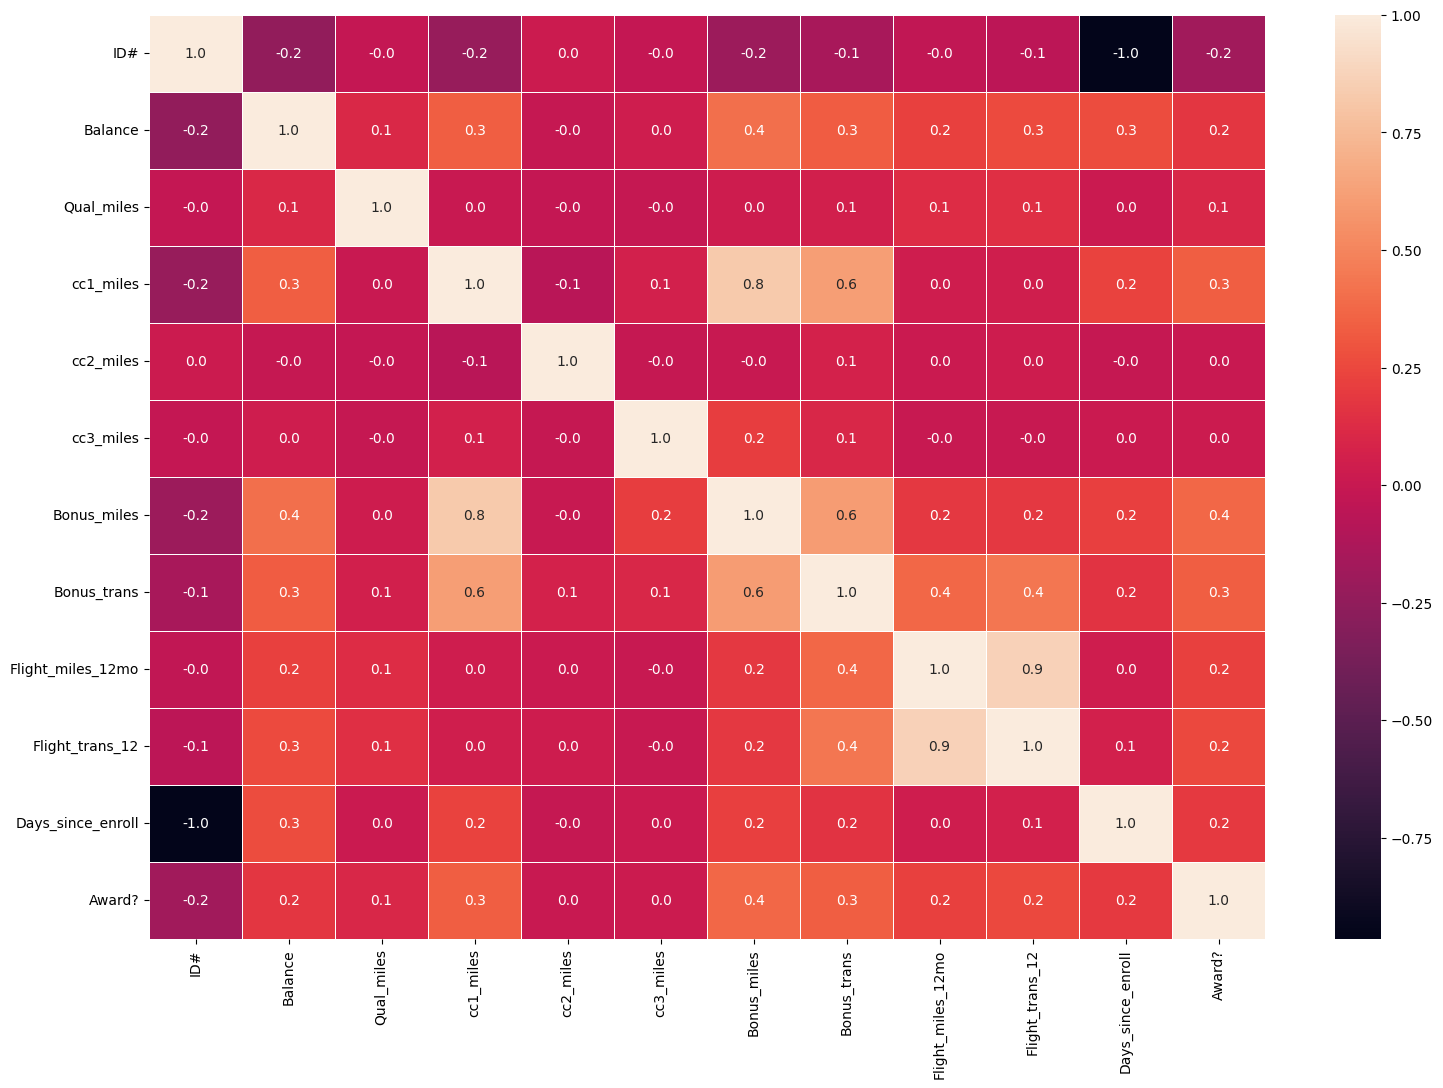

In [5]:
# correlation heatmap
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()


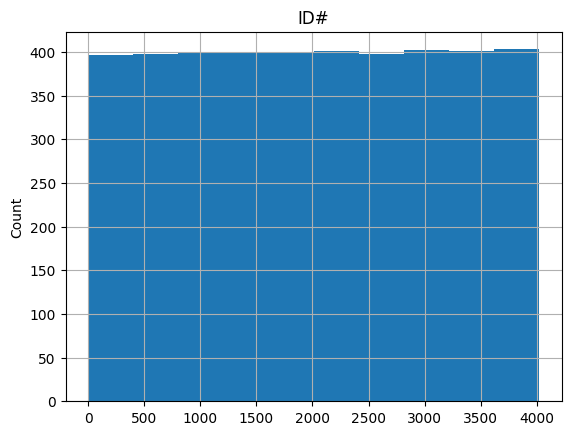

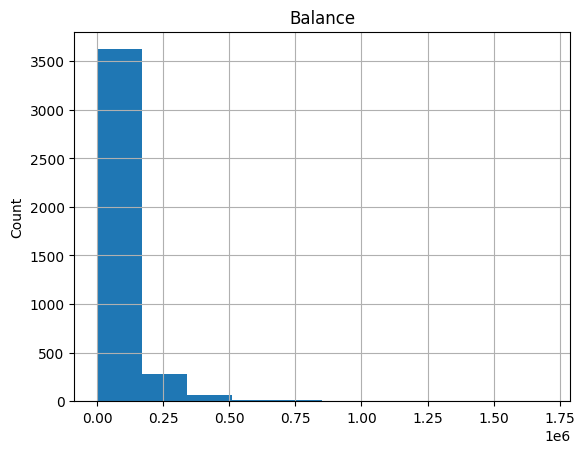

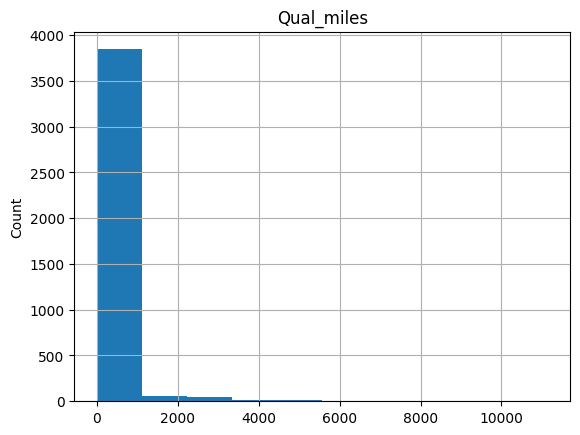

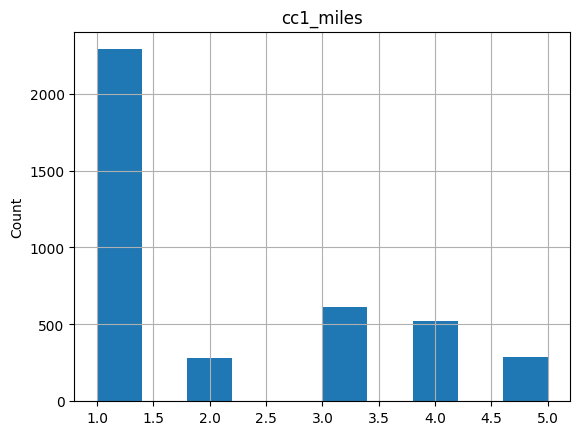

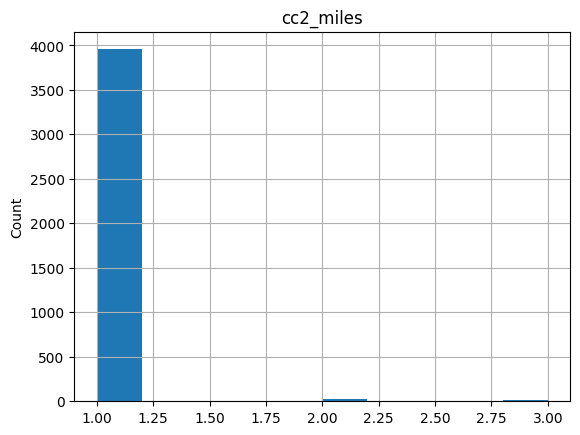

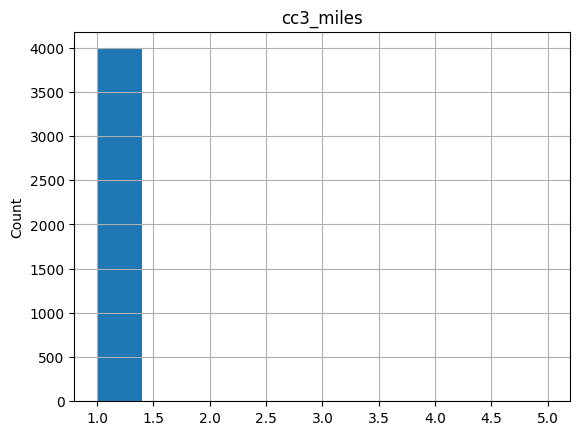

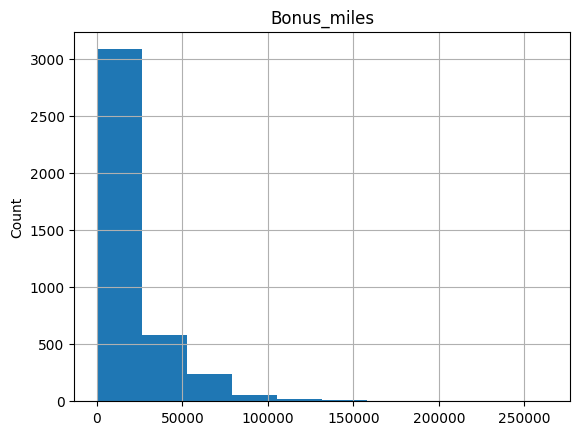

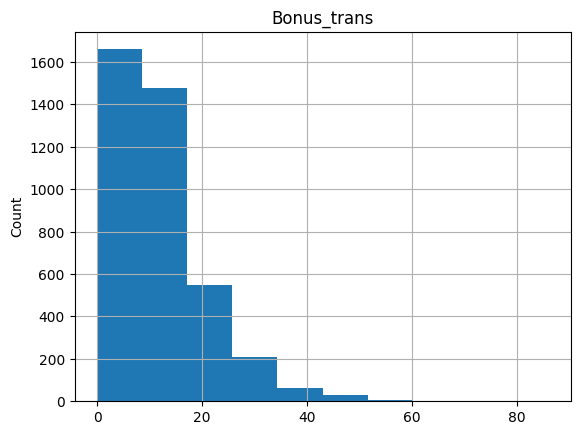

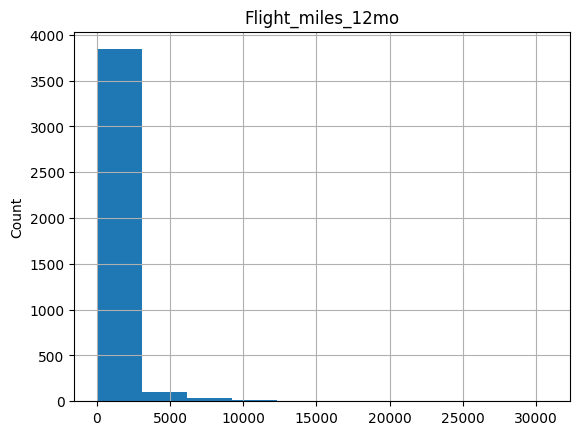

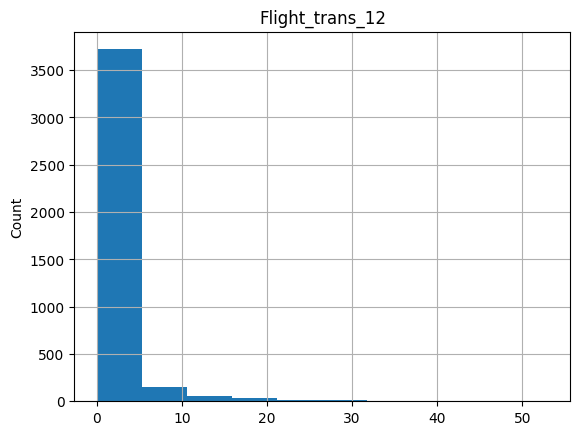

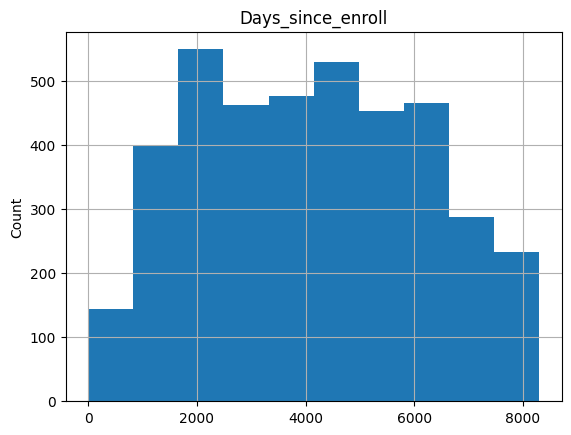

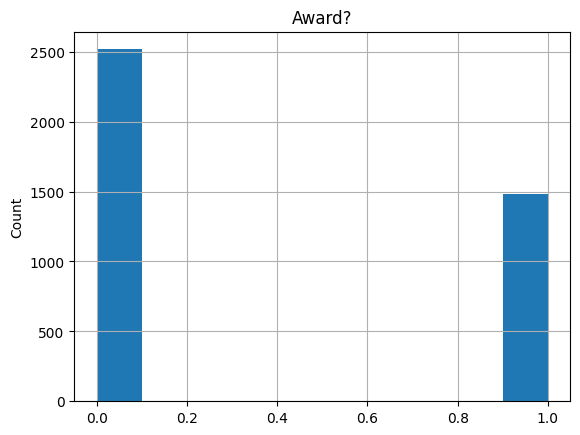

In [6]:
#plot histgraph
for i in df.columns:
    data=df.copy()
    data[i].hist(bins=10)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

<ipython-input-7-cedc39a64ab4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ID#',data=ot,palette='crest',ax=axes[0])
<ipython-input-7-cedc39a64ab4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[1])
<ipython-input-7-cedc39a64ab4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[2])
<ipython-input-7-cedc39a64ab4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable t

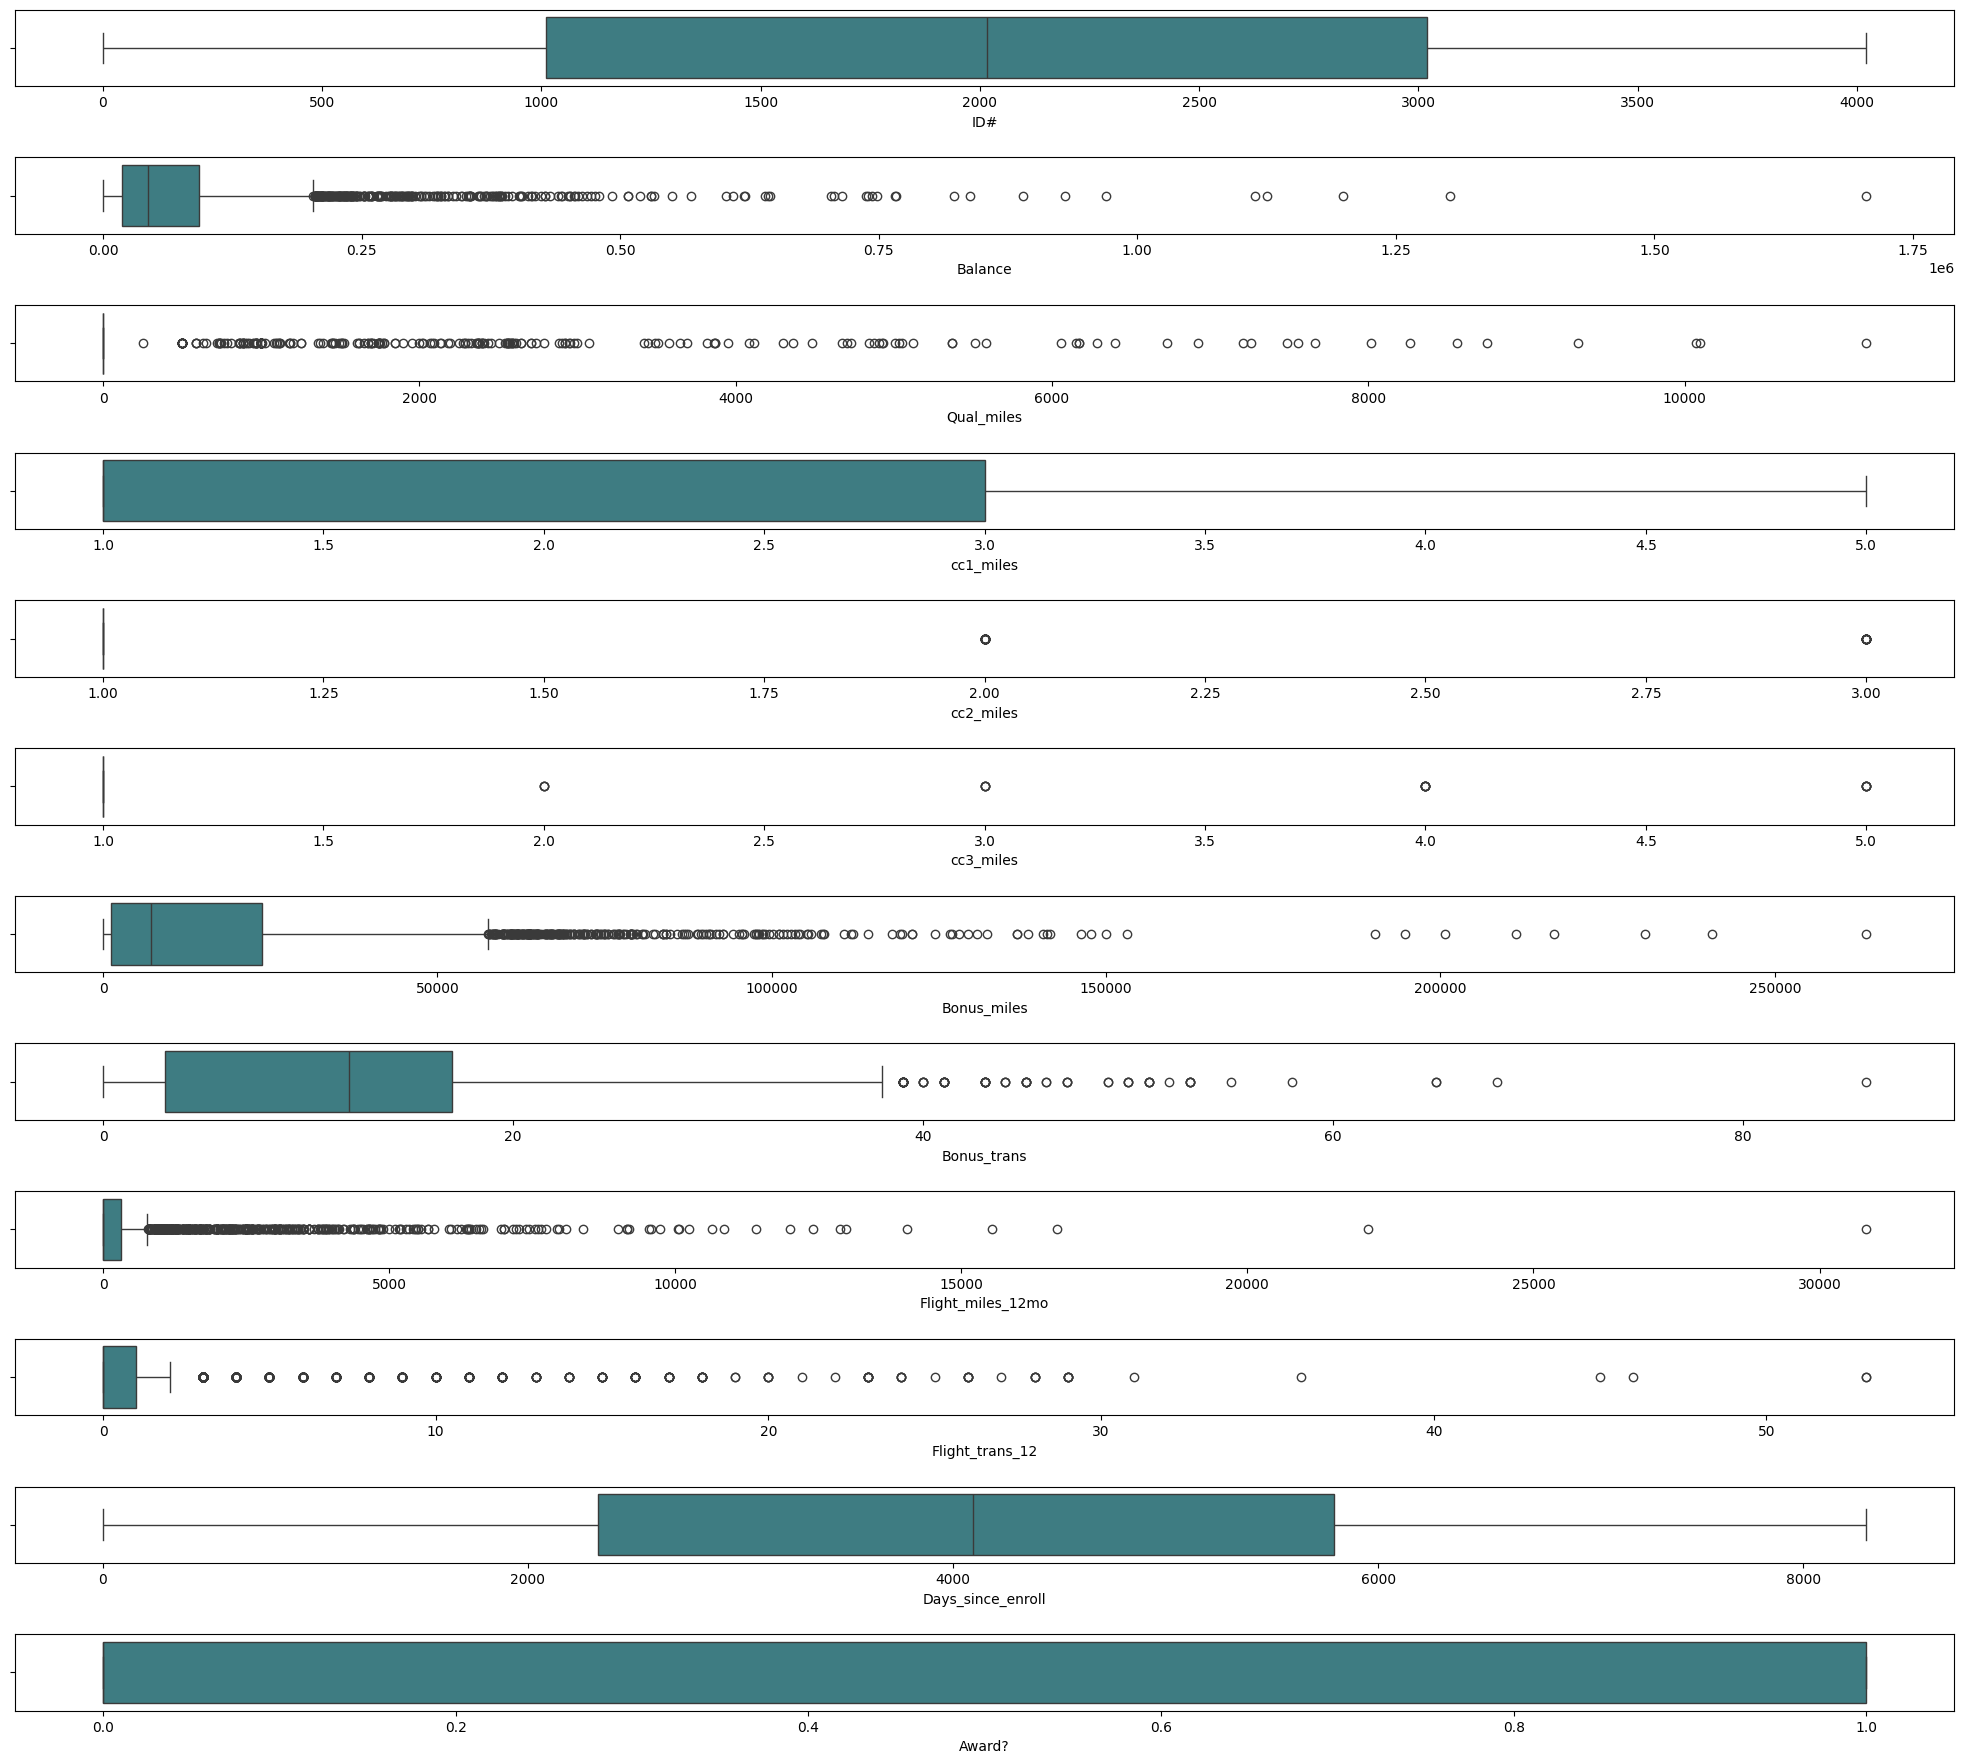

In [7]:
#boxplot
ot=df.copy()
fig, axes=plt.subplots(12,1,figsize=(20,18),sharex=False,sharey=False)
sns.boxplot(x='ID#',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Award?',data=ot,palette='crest',ax=axes[11])
plt.tight_layout(pad=2.0)


In [8]:

#finding outlier
def outlier_function(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    return lower,upper
outlier_function(df,'ID#')
outlier_function(df,'Balance')
outlier_function(df,'Qual_miles')
outlier_function(df,'cc1_miles')
outlier_function(df,'cc2_miles')
outlier_function(df,'cc3_miles')
outlier_function(df,'Bonus_miles')
outlier_function(df,'Bonus_trans')
outlier_function(df,'Flight_miles_12mo')
outlier_function(df,'Flight_trans_12')
outlier_function(df,'Days_since_enroll')
outlier_function(df,'Award?')

(-1.5, 2.5)

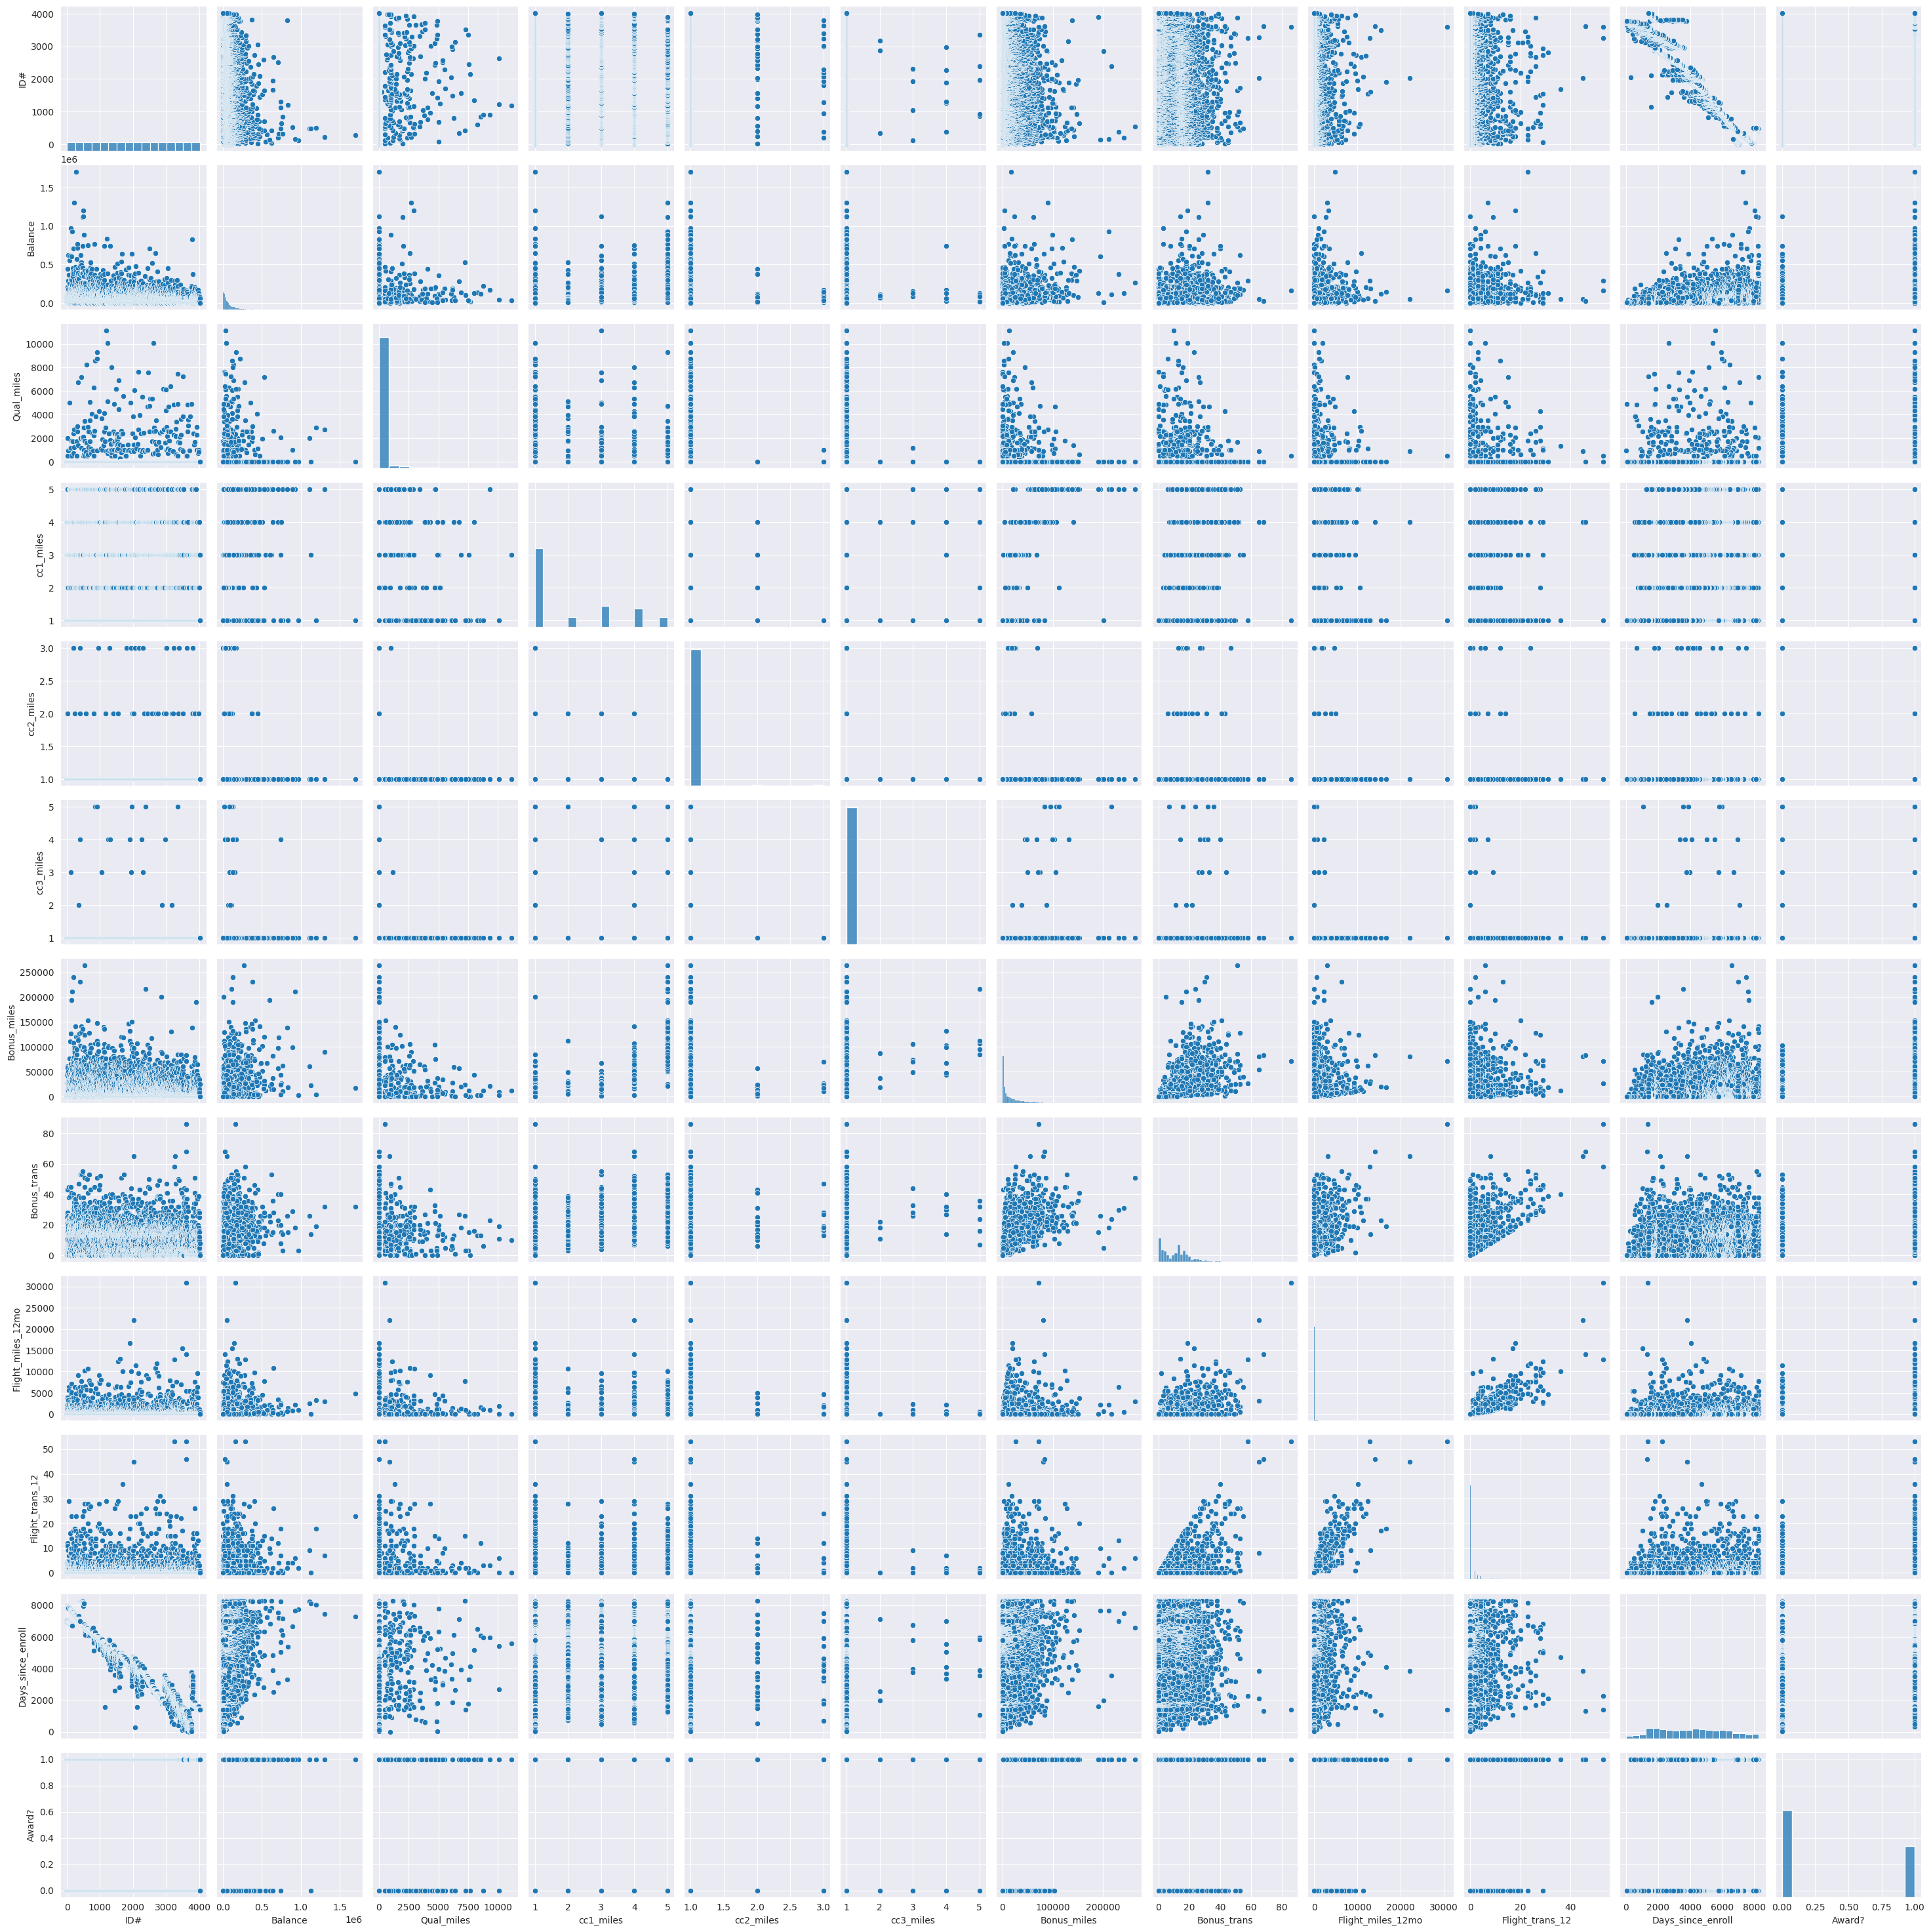

In [9]:
#
sns.set_style(style='darkgrid')
sns.pairplot(df)


In [ ]:
##### Data Transformations
### Standardscalar on continious data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for column in df.columns:
    if df[column].dtype=='object':
        continue
    df[column]=ss.fit_transform(df[[column]])

df


In [10]:
#creating X variables
X=df.iloc[:,1:]
X


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


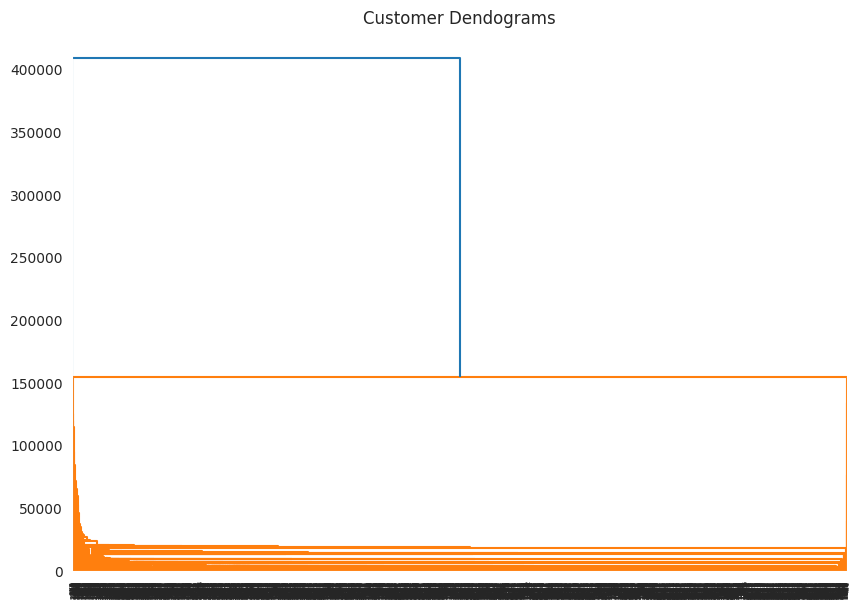

In [11]:
#Merthod=single
#Dendograms
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='single'))


In [12]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
Y = cluster.fit_predict(X)
Y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [13]:
#creating Y dataframe
Y_new = pd.DataFrame(Y)
#Y value counts
Y_new.value_counts()

0    3994
1       3
2       1
3       1
dtype: int64

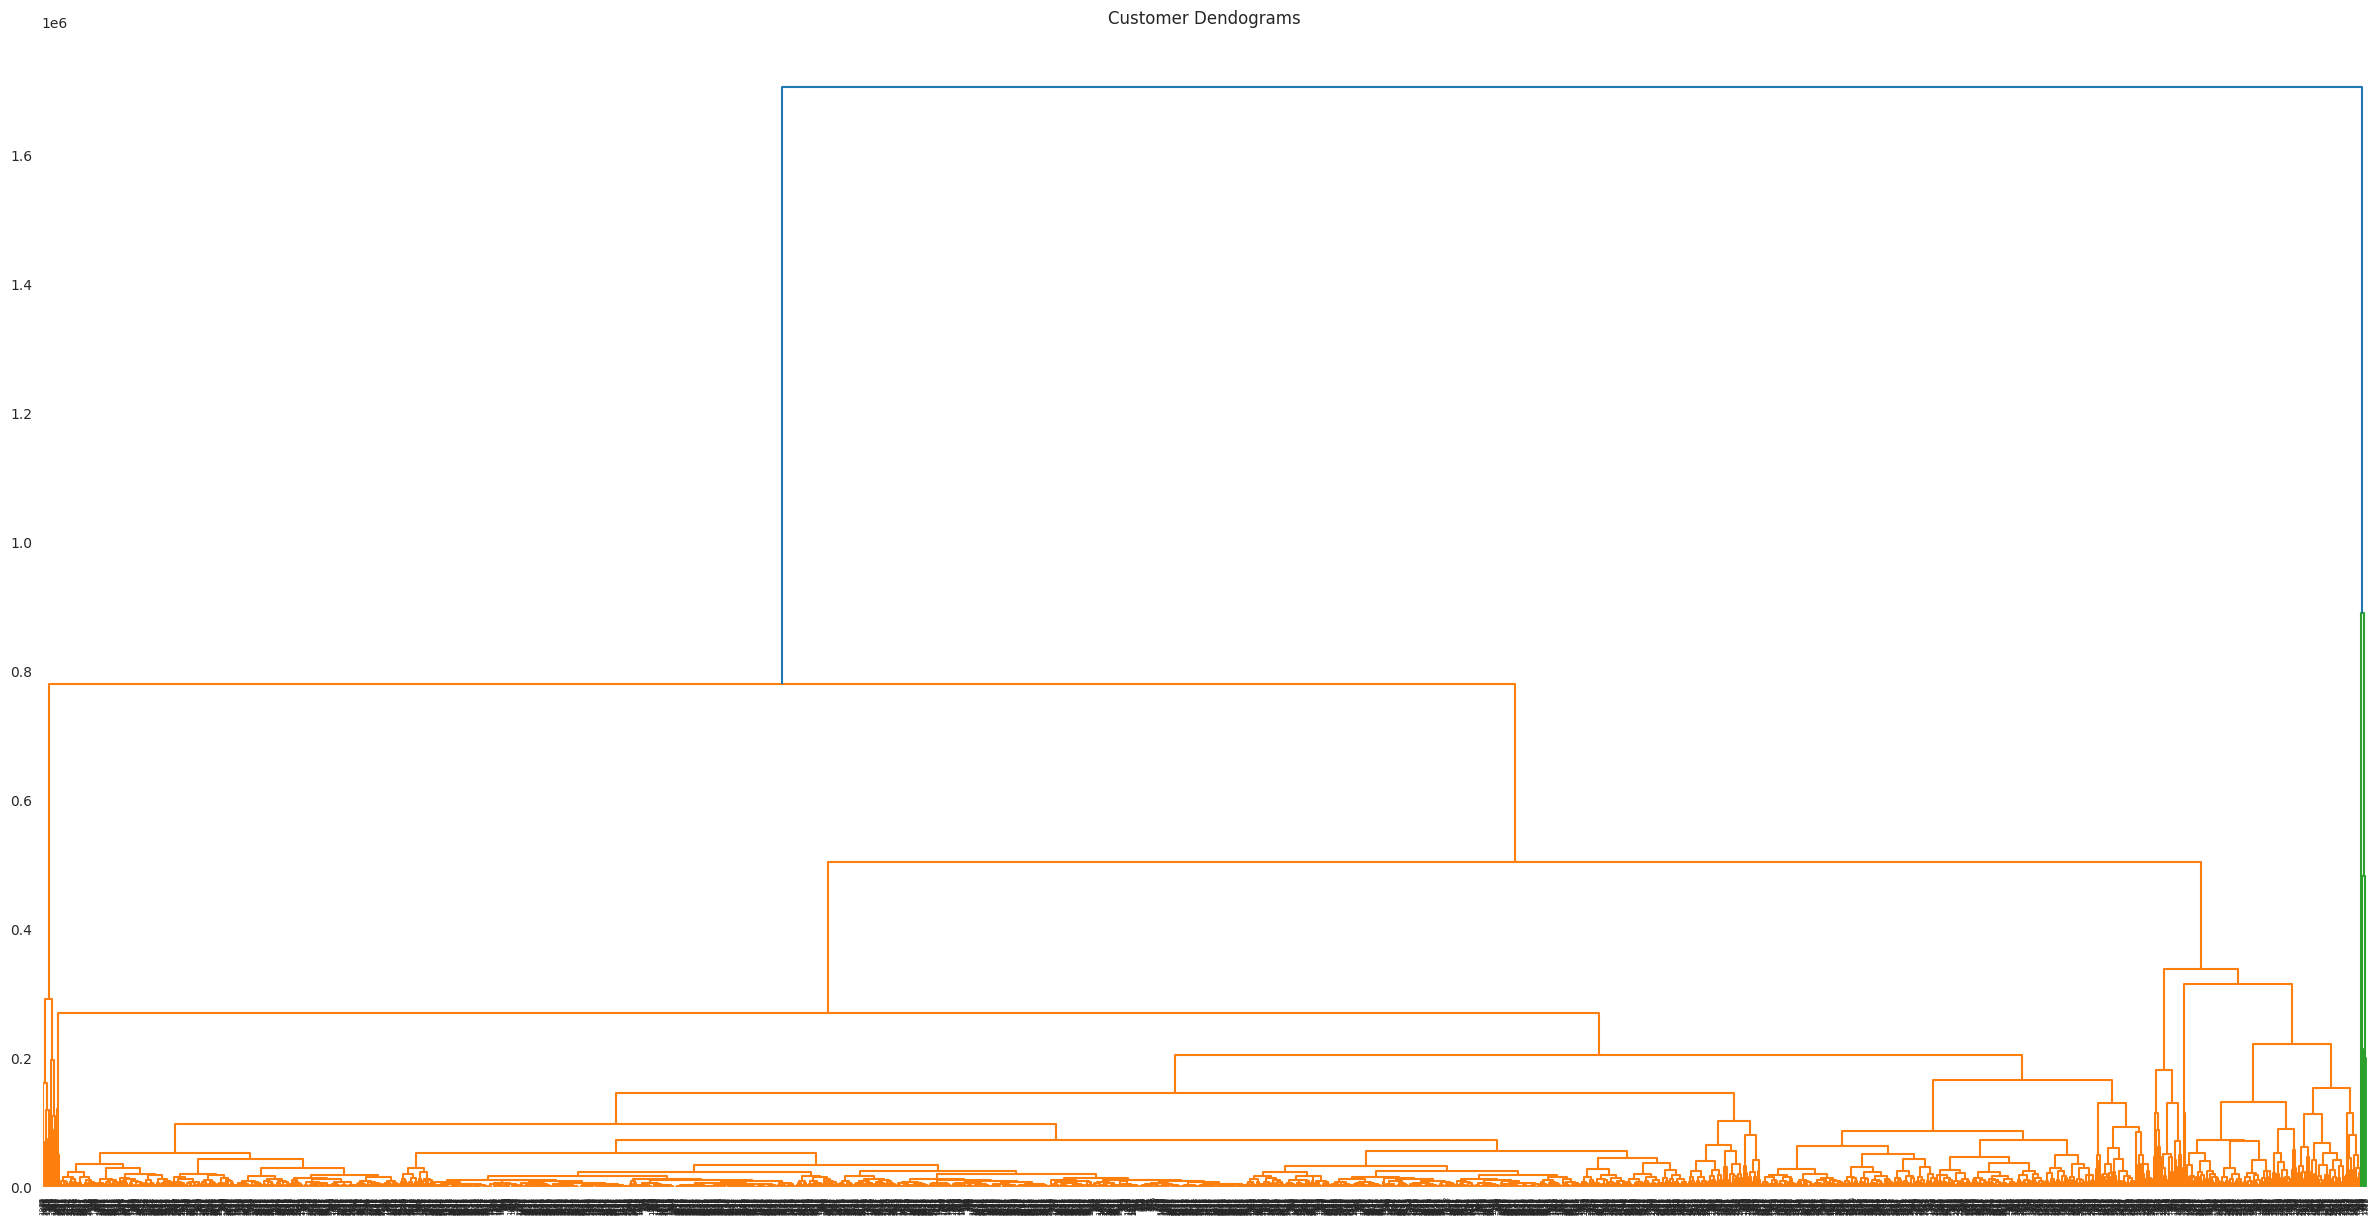

In [14]:
#Method = complete
#Dendograms
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'))

In [15]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(X)
Y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 4, 4, ..., 4, 4, 4])

In [16]:
#creating Y dataframe
Y_new = pd.DataFrame(Y)
#Y value counts
Y_new.value_counts()


4    3607
1     356
3      26
0       9
2       1
dtype: int64

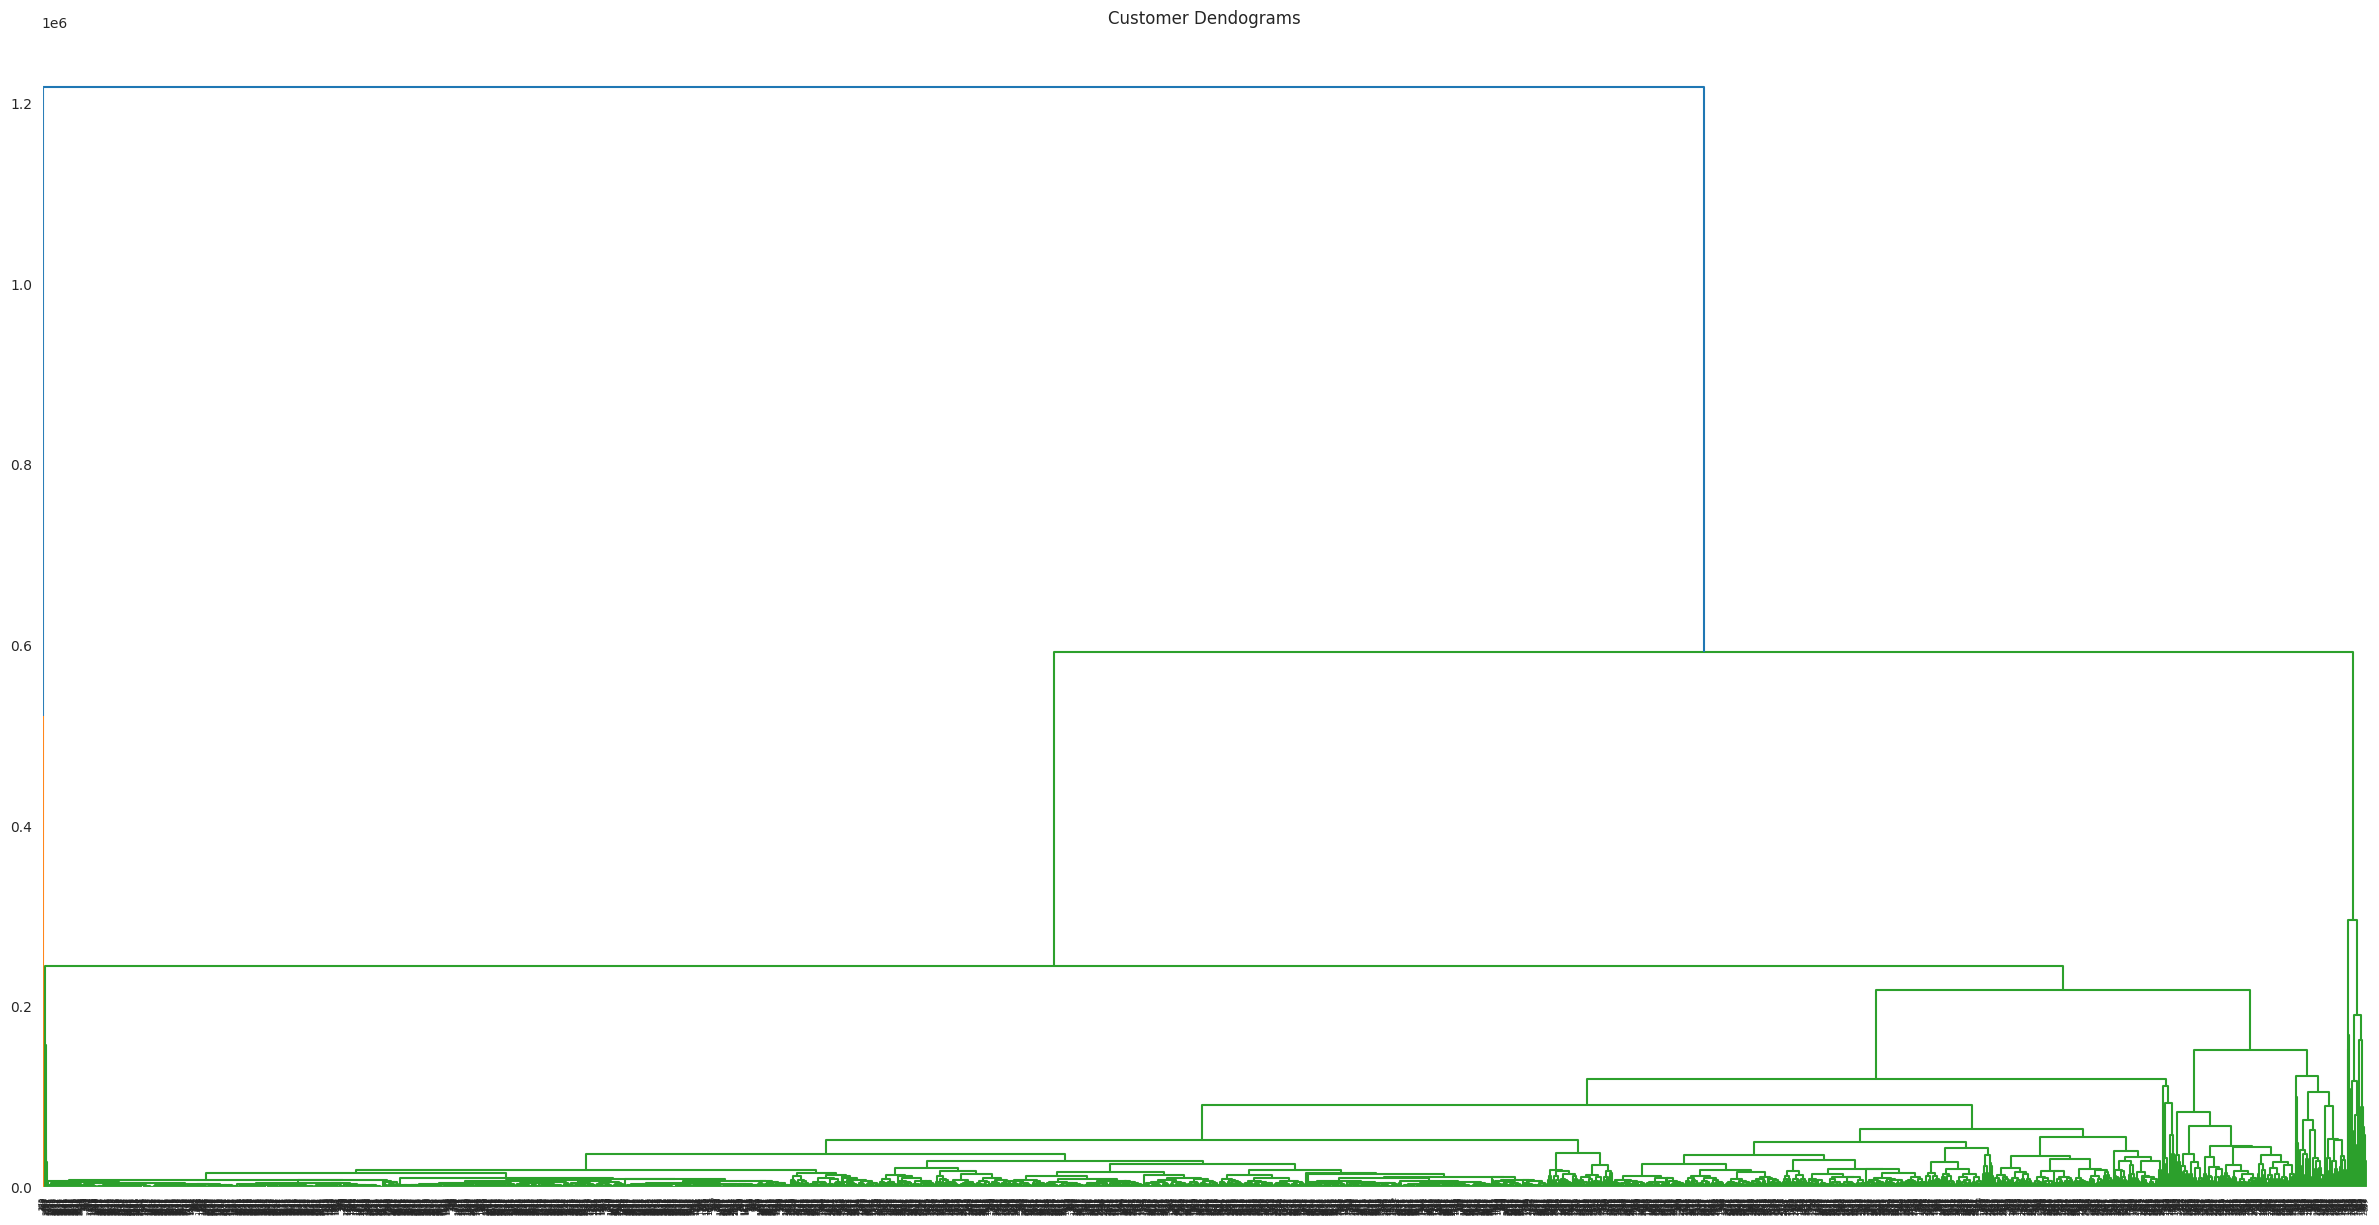

In [17]:
#Method = averagee
#Dendograms
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='average'))


In [18]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Y = cluster.fit_predict(X)
Y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2])

In [19]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Y = cluster.fit_predict(X)
Y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2])

In [20]:
#creating Y dataframe
Y_new = pd.DataFrame(Y)
#Y value counts
Y_new.value_counts()

2    3961
1      33
0       5
dtype: int64

In [21]:
#Initializing KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,n_init=20)

kmeans = kmeans.fit(X) # Fitting with inputs

In [22]:
#Predicting the clusters
Y = kmeans.predict(X)
#creating Y dataframe
Y_new = pd.DataFrame(Y)
#Y value counts
Y_new.value_counts()

1    2502
0    1048
4     342
2      88
3      19
dtype: int64

In [23]:
#Total with in centroid sum of squares
kmeans.inertia_

clust = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    clust.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

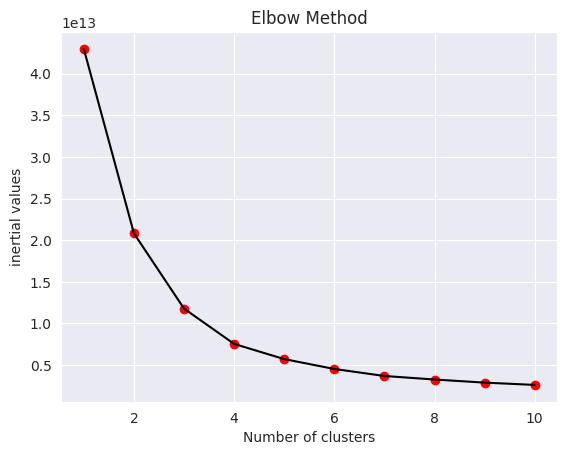

In [24]:
#Elbow method
plt.scatter(x=range(1,11), y=clust,color='red')
plt.plot(range(1,11), clust,color='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

In [25]:
#DBSCAN
X = df.iloc[:,1:].values
X

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)

In [26]:
#fitting dbscan
dbscan.fit(X)

Y = dbscan.labels_
pd.DataFrame(Y).value_counts()

-1    3999
dtype: int64

In [27]:
#creating cluster id with dataframe
df["Cluster id"] = pd.DataFrame(Y)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [28]:
#Checking the noise points
noise_points = df[df["Cluster id"] == -1]
noise_points

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,-1


In [29]:
#final data
Finaldata = df[(df["Cluster id"] == 0)| (df["Cluster id"] == 1)
               |(df["Cluster id"] == 2)].reset_index(drop=True)
Finaldata

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster id
